# JOBS DATABASE - Skill set  and Salary Prediction 

### Satvika Vinay Shetty 
### NUID - 001837927 
### CRN - 37372


Abstract: 
My analysis is based on the key finding of data of 5 different job title (Data Scientist, Solution Architect,Supply Chain Analyst, Data Analyst and Software Engineer) and for 30 cities in the United States. Based on retrieved datafrom Indeed.com I analysed the Salary for a particular location and Skill Set for a Particular Job Title.The Data is extracted by implementing Data Scraping using BeautifulSoup. I found that the median salaries for 30 cities is 100000.0 and the mean is 99960.00868637611, this value was used to predict my salary model to see if the salary was above or below median. I also found that the most importantr skill set for a data scientist would be Python , R, Hadoop where the least required skill set would be Ruby, Pearl,Fume etc. using  Natural Language Processing I determined the characteristics that would help segregate the data into a above or below median categorical column. To start with my analysis, I installed the wordcloud package using " conda install -c conda-forge wordcloud ".
The dataset has the following attributes: 
- Job_Title : stored the job title data 
- Company : stores the company name
- Location : store the city and state name where the comoany is located
- Salary : stores the salary information for that job 
- Summary - stored the brief description about the job 



In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import time
from time import sleep 
import numpy as np 


In [2]:
def get_title(result):
    try:
        return result.find('a',{'data-tn-element':'jobTitle'}).text
    except:
        return 'NA'

def get_company(result):
    try:
        return result.find('span',{'class':'company'}).text
    except:
        return 'NA'
    
def get_location(result):
    try:
        if (result.find('div',{'class':'location'}).text) :
            return result.find('div',{'class':'location'}).text
        
    except:
        try:
            return result.find('span',{'class':'location'}).text
        except:
            return 'NA'


def get_salary(result):
    try: 
        return result.find('span',{'class':'salary no-wrap'}).text
    except:
        return 'NA'

def get_jobSummary(result):
    try:
        return result.find('div',{'class':'summary'}).text
    except:
        return 'NA'


    

In [3]:
indeed_cities = ['Atlanta', 'Austin', 'Boston', 'Charlotte',
                 'Chicago', 'Cincinnati', 'Columbus', 'Dallas', 
                 'Denver', 'Houston', 'Indianapolis', 'Jacksonville', 
                 'Kansas+City', 'Los+Angeles', 'Miami', 'Minneapolis',
                 'Nashville','New+York', 'Oakland', 'Philadelphia',
                 'Phoenix', 'Pittsburgh', 'Portland','San+Diego',
                 'San+Francisco', 'San+Jose', 'Seattle', 'St.+Louis',
                 'Tampa', 'Washington%2C+DC']

title = 'Data+Scientist'

In [4]:
print(indeed_cities)


['Atlanta', 'Austin', 'Boston', 'Charlotte', 'Chicago', 'Cincinnati', 'Columbus', 'Dallas', 'Denver', 'Houston', 'Indianapolis', 'Jacksonville', 'Kansas+City', 'Los+Angeles', 'Miami', 'Minneapolis', 'Nashville', 'New+York', 'Oakland', 'Philadelphia', 'Phoenix', 'Pittsburgh', 'Portland', 'San+Diego', 'San+Francisco', 'San+Jose', 'Seattle', 'St.+Louis', 'Tampa', 'Washington%2C+DC']


In [6]:
indeed_cities_max_result = 1000
results = []
for city in indeed_cities:
    for start in range(0, indeed_cities_max_result , 100):
        url = "https://www.indeed.com/jobs?q=" + title + "&salary=&radius=25&l=" + city +"&fromage=any&limit=100&start=" + str(start) + "&sort=&psf=advsrch"
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')
        for result in soup.find_all('div', {'class':'row'}):
            #print(result)
            results.append(result)
        time.sleep(1)

In [7]:
job_temp = []
for each in results:
    
    jobTitle = get_title(each)
    Comp = get_company(each)
    Loc = get_location(each)
    Sal = get_salary(each)
    Sum = get_jobSummary(each)
    job_temp.append([jobTitle,Comp, Loc, Sal, Sum])


In [8]:
jobs_dataScientist = pd.DataFrame(data= job_temp,columns = (['Job_Title' , 'Company' , 'Location' , 'Salary' , 'Summary']))

In [9]:
jobs_dataScientist.head(20)

,Job_Title,Company,Location,Salary,Summary
0,\nData Scientist,"\n Barrister Global Services Network, Inc","Atlanta, GA","\n $90,000 - $110,000 a year",\n Transfer some of the impactful t...
1,\nData Science Instructor,\n Thinkful,"Atlanta, GA",\n $20 - $25 an hour,"\n Proficiency in SQL, Python, scik..."
2,\n Healthcare Data Science Consultant,\n\n Accenture,"Atlanta, GA 30303 (Five Points area)","\n $104,000 - $154,000 a year (...","\n Use statistics, data mining, mac..."
3,\nData Scientist,\n SoCal Tech Recruiter,"Atlanta, GA","\n $102,000 - $150,000 a year (...",\n In this role you will be solving...
4,\n Senior Data Scientist,\n\n Verizon,"Alpharetta, GA 30022",NA,"\n As a Senior Data Scientist, you’..."
5,\nData Scientist/Machine Learning Trainee,\n\n Norfolk Southern Corp,"Atlanta, GA 30309 (Midtown area)","\n $105,000 - $154,000 a year (...",\n As a Data Scientist/Machine Lear...
6,\nData Science Masters Intern,\n\n Honeywell,"Atlanta, GA 30308 (Old Fourth Ward area)",NA,\n We value our more seasoned data ...
7,\nData Scientist,\n\n UNITED PARCEL SERVICE,"Alpharetta, GA",NA,\n Collaborates with cross-function...
8,\nData Scientist,\n\n Equifax,"Atlanta, GA 30309 (Midtown area)","\n $76,000 - $112,000 a year (I...",\n You will conduct Big Data analyt...
9,\nData Scientist,\n\n SunTrust,"Atlanta, GA","\n $85,000 - $126,000 a year (I...",\n Performs sophisticated data anal...


In [10]:
jobs_dataScientist.shape

(16473, 5)

In [11]:
jobs_dataScientist['Company'] = jobs_dataScientist['Company'].str.replace('\n',' ')
jobs_dataScientist['Summary'] = jobs_dataScientist['Summary'].str.replace('\n',' ')
jobs_dataScientist['Salary'] = jobs_dataScientist['Salary'].str.replace('\n',' ')
jobs_dataScientist['Job_Title'] = jobs_dataScientist['Job_Title'].str.replace('\n',' ')


In [12]:
jobs_dataScientist.head()

,Job_Title,Company,Location,Salary,Summary
0,Data Scientist,"Barrister Global Services Network, Inc","Atlanta, GA","$90,000 - $110,000 a year",Transfer some of the impactful th...
1,Data Science Instructor,Thinkful,"Atlanta, GA",$20 - $25 an hour,"Proficiency in SQL, Python, sciki..."
2,Healthcare Data Science Consultant,Accenture,"Atlanta, GA 30303 (Five Points area)","$104,000 - $154,000 a year (I...","Use statistics, data mining, mach..."
3,Data Scientist,SoCal Tech Recruiter,"Atlanta, GA","$102,000 - $150,000 a year (I...",In this role you will be solving ...
4,Senior Data Scientist,Verizon,"Alpharetta, GA 30022",NA,"As a Senior Data Scientist, you’l..."


In [13]:
jobs_dataScientist_csv = jobs_dataScientist.to_csv('jobs_dataScientist.csv')

In [14]:
prediction1_salary = pd.read_csv('jobs_dataScientist.csv')

In [15]:
salary_pred = prediction1_salary[prediction1_salary['Salary'].notnull()]

In [16]:
salary_pred.shape

(1888, 6)

In [17]:
salary_pred.head()

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
0,0,Data Scientist,"Barrister Global Services Network, Inc","Atlanta, GA","$90,000 - $110,000 a year",Transfer some of the impactful th...
1,1,Data Science Instructor,Thinkful,"Atlanta, GA",$20 - $25 an hour,"Proficiency in SQL, Python, sciki..."
2,2,Healthcare Data Science Consultant,Accenture,"Atlanta, GA 30303 (Five Points area)","$104,000 - $154,000 a year (I...","Use statistics, data mining, mach..."
3,3,Data Scientist,SoCal Tech Recruiter,"Atlanta, GA","$102,000 - $150,000 a year (I...",In this role you will be solving ...
5,5,Data Scientist/Machine Learning Trainee,Norfolk Southern Corp,"Atlanta, GA 30309 (Midtown area)","$105,000 - $154,000 a year (I...",As a Data Scientist/Machine Learn...


In [18]:
salary_pred=salary_pred[(~salary_pred['Salary'].str.contains('an hour')) & (~salary_pred['Salary'].str.contains('a month')) 
                        &(~salary_pred['Salary'].str.contains('a week')) &(~salary_pred['Salary'].str.contains('a day'))]




In [19]:
salary_pred['Salary'] = salary_pred['Salary'].str.replace('a year', '').str.replace('$','').str.replace(',','')

In [20]:
salary_pred.head()

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
0,0,Data Scientist,"Barrister Global Services Network, Inc","Atlanta, GA",90000 - 110000,Transfer some of the impactful th...
2,2,Healthcare Data Science Consultant,Accenture,"Atlanta, GA 30303 (Five Points area)",104000 - 154000 (Indeed est.),"Use statistics, data mining, mach..."
3,3,Data Scientist,SoCal Tech Recruiter,"Atlanta, GA",102000 - 150000 (Indeed est.),In this role you will be solving ...
5,5,Data Scientist/Machine Learning Trainee,Norfolk Southern Corp,"Atlanta, GA 30309 (Midtown area)",105000 - 154000 (Indeed est.),As a Data Scientist/Machine Learn...
8,8,Data Scientist,Equifax,"Atlanta, GA 30309 (Midtown area)",76000 - 112000 (Indeed est.),You will conduct Big Data analyti...


### Doing the same of Software Engineer for the 30 Cities

In [21]:
indeed_cities = ['Atlanta', 'Austin', 'Boston', 'Charlotte',
                 'Chicago', 'Cincinnati', 'Columbus', 'Dallas', 
                 'Denver', 'Houston', 'Indianapolis', 'Jacksonville', 
                 'Kansas+City', 'Los+Angeles', 'Miami', 'Minneapolis',
                 'Nashville','New+York', 'Oakland', 'Philadelphia',
                 'Phoenix', 'Pittsburgh', 'Portland','San+Diego',
                 'San+Francisco', 'San+Jose', 'Seattle', 'St.+Louis',
                 'Tampa', 'Washington%2C+DC']
len(indeed_cities)
title = 'Software+Engineer'

In [22]:
indeed_cities_max_result = 1000
results = []
for city in indeed_cities:
    for start in range(0, indeed_cities_max_result , 100):
        url = "https://www.indeed.com/jobs?q=" + title + "&salary=&radius=25&l=" + city +"&fromage=any&limit=100&start=" + str(start) + "&sort=&psf=advsrch"
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')
        for result in soup.find_all('div', {'class':'row'}):
            #print(result)
            results.append(result)
        time.sleep(1)

In [23]:
job_temp = []
for each in results:
    
    jobTitle = get_title(each)
    Comp = get_company(each)
    Loc = get_location(each)
    Sal = get_salary(each)
    Sum = get_jobSummary(each)
    job_temp.append([jobTitle,Comp, Loc, Sal, Sum])

In [24]:
jobs_softwareEng = pd.DataFrame(data= job_temp,columns = (['Job_Title' , 'Company' , 'Location' , 'Salary' , 'Summary']))



In [25]:
jobs_softwareEng.shape

(17516, 5)

In [26]:
jobs_softwareEng['Company'] = jobs_softwareEng['Company'].str.replace('\n',' ')
jobs_softwareEng['Summary'] = jobs_softwareEng['Summary'].str.replace('\n',' ')
jobs_softwareEng['Salary'] = jobs_softwareEng['Salary'].str.replace('\n',' ')
jobs_softwareEng['Job_Title'] = jobs_softwareEng['Job_Title'].str.replace('\n',' ')

In [27]:
jobs_softwareEng.head()

,Job_Title,Company,Location,Salary,Summary
0,Software Engineer,Indeed Prime,"Atlanta, GA","$70,000 - $100,000 a year",They would be very collaborative ...
1,Senior Software Engineer,Indeed Prime,"Atlanta, GA","$100,000 - $140,000 a year",Software Engineer responsibilities include ga...
2,Software Developer,RPI,"Kennesaw, GA",NA,5+ years of experience as softwar...
3,Software Engineer,Honeywell,"Atlanta, GA 30308 (Old Fourth Ward area)",NA,50 Software architecture and codi...
4,Software Engineer,"Veloxiti, Inc.","Alpharetta, GA 30022",NA,Qualified candidates should have ...


In [28]:
jobs_softwareEng_csv = jobs_softwareEng.to_csv('jobs_softwareEng.csv')

In [29]:
prediction1_salary_SE = pd.read_csv('jobs_softwareEng.csv')

In [30]:
salary_pred_SE = prediction1_salary_SE[prediction1_salary_SE['Salary'].notnull()]

In [31]:
salary_pred_SE.shape

(3850, 6)

In [32]:
salary_pred_SE.head()

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
0,0,Software Engineer,Indeed Prime,"Atlanta, GA","$70,000 - $100,000 a year",They would be very collaborative ...
1,1,Senior Software Engineer,Indeed Prime,"Atlanta, GA","$100,000 - $140,000 a year",Software Engineer responsibilities include ga...
5,5,Android Engineer,Opportunity Education,"Atlanta, GA","$90,000 - $115,000 a year","The Engineer, Mobile Applications..."
12,12,Software Engineer IV,Tek Wissen LLC,"Atlanta, GA 30328",$68 an hour,Software Engineer IV*. We are looking for a s...
17,17,Software Developer,NovelVox,"Atlanta, GA","$75,000 - $85,000 a year",The Java developer will lead in d...


In [33]:
salary_pred_SE=salary_pred_SE[(~salary_pred_SE['Salary'].str.contains('an hour')) & (~salary_pred_SE['Salary'].str.contains('a month')) 
                        &(~salary_pred_SE['Salary'].str.contains('a week')) &(~salary_pred_SE['Salary'].str.contains('a day'))]




In [34]:
salary_pred_SE['Salary'] = salary_pred_SE['Salary'].str.replace('a year', '')
salary_pred_SE['Salary'] = salary_pred_SE['Salary'].str.replace('$','')
salary_pred_SE['Salary'] = salary_pred_SE['Salary'].str.replace(',','')

In [35]:
salary_pred_SE

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
0,0,Software Engineer,Indeed Prime,"Atlanta, GA",70000 - 100000,They would be very collaborative ...
1,1,Senior Software Engineer,Indeed Prime,"Atlanta, GA",100000 - 140000,Software Engineer responsibilities include ga...
5,5,Android Engineer,Opportunity Education,"Atlanta, GA",90000 - 115000,"The Engineer, Mobile Applications..."
17,17,Software Developer,NovelVox,"Atlanta, GA",75000 - 85000,The Java developer will lead in d...
18,18,Robotics Software Engineer,Dorabot Inc.,"Atlanta, GA",70000 - 100000,Strong software engineering skill...
20,20,Full Stack Software Engineer,Flourish Software - Headway,"Atlanta, GA",100000 - 130000,If you enjoy solving difficult pr...
28,28,Software Engineer,Process Control Corporation,"Atlanta, GA 30340",50000 - 95000,Process Control Corp is seeking q...
30,30,Sr. Software Developer I,Client Focus,"Atlanta, GA 30303 (Five Points area)",115000,"Design, develop, implement, test,..."
34,34,C++ Software Engineer,Dorabot Inc.,"Atlanta, GA",65000 - 100000,Integrate libraries and other sof...
43,43,Jr/Mid Java Software Engineer,Deposco,"Alpharetta, GA 30022",65000 - 80000,We are looking to expand our team...


In [36]:
salary_pred_SE['Location'] = salary_pred_SE['Location'].str.split( '\d', expand=True, n=1)

In [37]:
salary_pred_SE

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
0,0,Software Engineer,Indeed Prime,"Atlanta, GA",70000 - 100000,They would be very collaborative ...
1,1,Senior Software Engineer,Indeed Prime,"Atlanta, GA",100000 - 140000,Software Engineer responsibilities include ga...
5,5,Android Engineer,Opportunity Education,"Atlanta, GA",90000 - 115000,"The Engineer, Mobile Applications..."
17,17,Software Developer,NovelVox,"Atlanta, GA",75000 - 85000,The Java developer will lead in d...
18,18,Robotics Software Engineer,Dorabot Inc.,"Atlanta, GA",70000 - 100000,Strong software engineering skill...
20,20,Full Stack Software Engineer,Flourish Software - Headway,"Atlanta, GA",100000 - 130000,If you enjoy solving difficult pr...
28,28,Software Engineer,Process Control Corporation,"Atlanta, GA",50000 - 95000,Process Control Corp is seeking q...
30,30,Sr. Software Developer I,Client Focus,"Atlanta, GA",115000,"Design, develop, implement, test,..."
34,34,C++ Software Engineer,Dorabot Inc.,"Atlanta, GA",65000 - 100000,Integrate libraries and other sof...
43,43,Jr/Mid Java Software Engineer,Deposco,"Alpharetta, GA",65000 - 80000,We are looking to expand our team...


## Scraping Data For Supply Chain Analyst for 30 Cities

In [38]:
indeed_cities = ['Atlanta', 'Austin', 'Boston', 'Charlotte',
                 'Chicago', 'Cincinnati', 'Columbus', 'Dallas', 
                 'Denver', 'Houston', 'Indianapolis', 'Jacksonville', 
                 'Kansas+City', 'Los+Angeles', 'Miami', 'Minneapolis',
                 'Nashville','New+York', 'Oakland', 'Philadelphia',
                 'Phoenix', 'Pittsburgh', 'Portland','San+Diego',
                 'San+Francisco', 'San+Jose', 'Seattle', 'St.+Louis',
                 'Tampa', 'Washington%2C+DC']
len(indeed_cities)
title = 'Supply+Chain+Analyst'

In [39]:
indeed_cities_max_result = 1000
results = []
for city in indeed_cities:
    for start in range(0, indeed_cities_max_result , 100):
        url = "https://www.indeed.com/jobs?q=" + title + "&salary=&radius=25&l=" + city +"&fromage=any&limit=100&start=" + str(start) + "&sort=&psf=advsrch"
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')
        for result in soup.find_all('div', {'class':'row'}):
            #print(result)
            results.append(result)
        time.sleep(1)

In [40]:
job_temp = []
for each in results:
    
    jobTitle = get_title(each)
    Comp = get_company(each)
    Loc = get_location(each)
    Sal = get_salary(each)
    Sum = get_jobSummary(each)
    job_temp.append([jobTitle,Comp, Loc, Sal, Sum])

In [41]:
jobs_supplychain = pd.DataFrame(data= job_temp,columns = (['Job_Title' , 'Company' , 'Location' , 'Salary' , 'Summary']))




In [42]:
jobs_supplychain.shape

(16178, 5)

In [43]:
jobs_supplychain['Company'] = jobs_supplychain['Company'].str.replace('\n',' ')
jobs_supplychain['Summary'] = jobs_supplychain['Summary'].str.replace('\n',' ')
jobs_supplychain['Salary'] = jobs_supplychain['Salary'].str.replace('\n',' ')
jobs_supplychain['Job_Title'] = jobs_supplychain['Job_Title'].str.replace('\n',' ')

In [44]:
jobs_supplychain.head()

,Job_Title,Company,Location,Salary,Summary
0,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA","$55,000 a year",Performing comprehensive supply c...
1,Integration Consulting Analyst (E...,Barkawi Management Consulting,"Atlanta, GA","$55,000 a year",Performing comprehensive supply c...
2,Transportation Project Analyst,Foresite Group,"Peachtree Corners, GA",NA,Foresite Group is seeking a motiv...
3,WMS Functional Consultant,Cirruslabs.io,"Atlanta, GA",NA,2-5 years’ experience in applicat...
4,Supply Chain Analyst,Astral Health & Beauty,"Atlanta, GA",NA,Supply Chain Analyst. Supply Chain Manager. T...


In [45]:
jobs_supplychain_csv = jobs_supplychain.to_csv('jobs_supplychain.csv')

In [46]:
prediction1_salary_SCA = pd.read_csv('jobs_supplychain.csv')

In [47]:
salary_pred_SCA = prediction1_salary_SCA[prediction1_salary_SCA['Salary'].notnull()]

In [48]:
salary_pred_SCA.shape

(1263, 6)

In [49]:
salary_pred_SCA.head()

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
0,0,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA","$55,000 a year",Performing comprehensive supply c...
1,1,Integration Consulting Analyst (E...,Barkawi Management Consulting,"Atlanta, GA","$55,000 a year",Performing comprehensive supply c...
9,9,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA","$55,000 a year",Performing comprehensive supply c...
15,15,Integration Consulting Analyst (E...,Barkawi Management Consulting,"Atlanta, GA","$55,000 a year",Performing comprehensive supply c...
33,33,Manufacturing Procurement Analyst,Matrss,"Kennesaw, GA",$21.43 - $29.99 an hour,Analyst will perform sourcing of minor capita...


In [50]:
salary_pred_SCA=salary_pred_SCA[(~salary_pred_SCA['Salary'].str.contains('an hour')) & (~salary_pred_SCA['Salary'].str.contains('a month')) 
                        &(~salary_pred_SCA['Salary'].str.contains('a week')) &(~salary_pred_SCA['Salary'].str.contains('a day'))]

In [51]:
salary_pred_SCA['Salary'] = salary_pred_SCA['Salary'].str.replace('a year', '')
salary_pred_SCA['Salary'] = salary_pred_SCA['Salary'].str.replace('$','')
salary_pred_SCA['Salary'] = salary_pred_SCA['Salary'].str.replace(',','')

In [52]:
salary_pred_SCA.head()

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
0,0,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
1,1,Integration Consulting Analyst (E...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
9,9,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
15,15,Integration Consulting Analyst (E...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
57,57,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...


In [53]:
salary_pred_SCA['Location'] = salary_pred_SCA['Location'].str.split( '\d', expand=True, n=1)

In [54]:
salary_pred_SCA

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
0,0,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
1,1,Integration Consulting Analyst (E...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
9,9,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
15,15,Integration Consulting Analyst (E...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
57,57,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
59,59,Integration Consulting Analyst (E...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
167,167,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
169,169,Integration Consulting Analyst (E...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
224,224,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...
226,226,Integration Consulting Analyst (E...,Barkawi Management Consulting,"Atlanta, GA",55000,Performing comprehensive supply c...


## Data Scraping for Solution Architect for 30 Cities

In [55]:
indeed_cities = ['Atlanta', 'Austin', 'Boston', 'Charlotte',
                 'Chicago', 'Cincinnati', 'Columbus', 'Dallas', 
                 'Denver', 'Houston', 'Indianapolis', 'Jacksonville', 
                 'Kansas+City', 'Los+Angeles', 'Miami', 'Minneapolis',
                 'Nashville','New+York', 'Oakland', 'Philadelphia',
                 'Phoenix', 'Pittsburgh', 'Portland','San+Diego',
                 'San+Francisco', 'San+Jose', 'Seattle', 'St.+Louis',
                 'Tampa', 'Washington%2C+DC']

title = 'Solution+Architect'

In [56]:
indeed_cities_max_result = 1000
results = []
for city in indeed_cities:
    for start in range(0, indeed_cities_max_result , 100):
        url = "https://www.indeed.com/jobs?q=" + title + "&salary=&radius=25&l=" + city +"&fromage=any&limit=100&start=" + str(start) + "&sort=&psf=advsrch"
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')
        for result in soup.find_all('div', {'class':'row'}):
            
            results.append(result)
        time.sleep(1)

In [57]:
job_temp = []
for each in results:
    
    jobTitle = get_title(each)
    Comp = get_company(each)
    Loc = get_location(each)
    Sal = get_salary(each)
    Sum = get_jobSummary(each)
    job_temp.append([jobTitle,Comp, Loc, Sal, Sum])

In [58]:
jobs_solnarch = pd.DataFrame(data= job_temp,columns = (['Job_Title' , 'Company' , 'Location' , 'Salary' , 'Summary']))




In [59]:
jobs_solnarch.shape

(16982, 5)

In [60]:
jobs_solnarch['Company'] = jobs_solnarch['Company'].str.replace('\n',' ')
jobs_solnarch['Summary'] = jobs_solnarch['Summary'].str.replace('\n',' ')
jobs_solnarch['Salary'] = jobs_solnarch['Salary'].str.replace('\n',' ')
jobs_solnarch['Job_Title'] = jobs_solnarch['Job_Title'].str.replace('\n',' ')

In [61]:
jobs_solnarch.head()

,Job_Title,Company,Location,Salary,Summary
0,AEM Architect,Augment Systems,"Atlanta, GA",NA,Strong problem-solving skills and...
1,UI Architect,BlueSky Resource Solutions,"Atlanta, GA 30350","$125,000 - $140,000 a year","UI Architect (Java, Angular)*. Th..."
2,Senior Field Solution Architect -...,CDW,"Atlanta, GA 30301 (Buckhead area)",NA,Field Solution Architect (FSA) ro...
3,Azure Cloud Architect,Cirruslabs.io,"Atlanta, GA",NA,"Reviews project requirements, eva..."
4,Specification Manager - Georgia,Panolam Surface Systems,"Atlanta, GA",NA,Understanding their needs through...


In [62]:
jobs_solnarch_csv = jobs_solnarch.to_csv('jobs_solnarch.csv')

In [63]:
prediction1_salary_solnarch = pd.read_csv('jobs_solnarch.csv')

In [64]:
salary_pred_solnarch = prediction1_salary_solnarch[prediction1_salary_solnarch['Salary'].notnull()]

In [65]:
salary_pred_solnarch.shape

(2301, 6)

In [66]:
salary_pred_solnarch.head(20)

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
1,1,UI Architect,BlueSky Resource Solutions,"Atlanta, GA 30350","$125,000 - $140,000 a year","UI Architect (Java, Angular)*. Th..."
7,7,Enterprise and Solution Architect,CodeForce360,"Atlanta, GA",$88 an hour,Enterprise and Solution Architect...
14,14,Solution Architect (Consultant),Fraxses LLC,"Atlanta, GA 30305 (Buckhead area)","$90,000 - $100,000 a year",Fraxses Limited has developed a d...
35,35,Splunk Engineer,Redzara,"Atlanta, GA",$50 - $60 an hour,This role requires the ability to...
54,54,Machine Learning Developer,Meshfore LLC,"Atlanta, GA",$60 an hour,"Experience in a customer-facing, ..."
61,61,UI Architect,BlueSky Resource Solutions,"Atlanta, GA 30350","$125,000 - $140,000 a year","UI Architect (Java, Angular)*. Th..."
66,66,Enterprise and Solution Architect,CodeForce360,"Atlanta, GA",$88 an hour,Enterprise and Solution Architect...
72,72,Architect - Licensed & Experienced,"3 Phase Associates, LLC","Atlanta, GA",$45 - $70 an hour,"Licensed Architect (AL, TN & GA) ..."
91,91,UX Researcher,Germane IT Solutions Inc.,"Atlanta, GA","$100,000 - $140,000 a year",Collaborating with product develo...
119,119,Engineering Technician,"DeKalb County, GA","DeKalb County, GA","$42,583 - $66,003 a year",And works with engineers and othe...


In [67]:
salary_pred_solnarch=salary_pred_solnarch[(~salary_pred_solnarch['Salary'].str.contains('an hour')) & (~salary_pred_solnarch['Salary'].str.contains('a month')) 
                        &(~salary_pred_solnarch['Salary'].str.contains('a week')) &(~salary_pred_solnarch['Salary'].str.contains('a day'))]

In [68]:
salary_pred_solnarch['Salary'] = salary_pred_solnarch['Salary'].str.replace('a year', '')
salary_pred_solnarch['Salary'] = salary_pred_solnarch['Salary'].str.replace('$','')
salary_pred_solnarch['Salary'] = salary_pred_solnarch['Salary'].str.replace(',','')

In [69]:
salary_pred_solnarch.head()

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
1,1,UI Architect,BlueSky Resource Solutions,"Atlanta, GA 30350",125000 - 140000,"UI Architect (Java, Angular)*. Th..."
14,14,Solution Architect (Consultant),Fraxses LLC,"Atlanta, GA 30305 (Buckhead area)",90000 - 100000,Fraxses Limited has developed a d...
61,61,UI Architect,BlueSky Resource Solutions,"Atlanta, GA 30350",125000 - 140000,"UI Architect (Java, Angular)*. Th..."
91,91,UX Researcher,Germane IT Solutions Inc.,"Atlanta, GA",100000 - 140000,Collaborating with product develo...
119,119,Engineering Technician,"DeKalb County, GA","DeKalb County, GA",42583 - 66003,And works with engineers and othe...


In [73]:
salary_pred_solnarch['Location'] = salary_pred_solnarch['Location'].str.split( '\d', expand=True, n=1)

In [74]:
salary_pred_solnarch.head()

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
1,1,UI Architect,BlueSky Resource Solutions,"Atlanta, GA",125000 - 140000,"UI Architect (Java, Angular)*. Th..."
14,14,Solution Architect (Consultant),Fraxses LLC,"Atlanta, GA",90000 - 100000,Fraxses Limited has developed a d...
61,61,UI Architect,BlueSky Resource Solutions,"Atlanta, GA",125000 - 140000,"UI Architect (Java, Angular)*. Th..."
91,91,UX Researcher,Germane IT Solutions Inc.,"Atlanta, GA",100000 - 140000,Collaborating with product develo...
119,119,Engineering Technician,"DeKalb County, GA","DeKalb County, GA",42583 - 66003,And works with engineers and othe...


## Data Scraping for Data Analyst for 30 cities

In [75]:
indeed_cities = ['Atlanta', 'Austin', 'Boston', 'Charlotte',
                 'Chicago', 'Cincinnati', 'Columbus', 'Dallas', 
                 'Denver', 'Houston', 'Indianapolis', 'Jacksonville', 
                 'Kansas+City', 'Los+Angeles', 'Miami', 'Minneapolis',
                 'Nashville','New+York', 'Oakland', 'Philadelphia',
                 'Phoenix', 'Pittsburgh', 'Portland','San+Diego',
                 'San+Francisco', 'San+Jose', 'Seattle', 'St.+Louis',
                 'Tampa', 'Washington%2C+DC']
len(indeed_cities)
title = 'Data+Analyst'

In [76]:
indeed_cities_max_result = 1000
results = []
for city in indeed_cities:
    for start in range(0, indeed_cities_max_result , 100):
        url = "https://www.indeed.com/jobs?q=" + title + "&salary=&radius=25&l=" + city +"&fromage=any&limit=100&start=" + str(start) + "&sort=&psf=advsrch"
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')
        for result in soup.find_all('div', {'class':'row'}):
            #print(result)
            results.append(result)
        time.sleep(1)

In [77]:
job_temp = []
for each in results:
    
    jobTitle = get_title(each)
    Comp = get_company(each)
    Loc = get_location(each)
    Sal = get_salary(each)
    Sum = get_jobSummary(each)
    job_temp.append([jobTitle,Comp, Loc, Sal, Sum])

In [78]:
jobs_danalyst = pd.DataFrame(data= job_temp,columns = (['Job_Title' , 'Company' , 'Location' , 'Salary' , 'Summary']))





In [79]:
jobs_danalyst.shape

(16858, 5)

In [80]:
jobs_danalyst['Company'] = jobs_danalyst['Company'].str.replace('\n',' ')
jobs_danalyst['Summary'] = jobs_danalyst['Summary'].str.replace('\n',' ')
jobs_danalyst['Salary'] = jobs_danalyst['Salary'].str.replace('\n',' ')
jobs_danalyst['Job_Title'] = jobs_danalyst['Job_Title'].str.replace('\n',' ')

In [81]:
jobs_danalyst.head()

,Job_Title,Company,Location,Salary,Summary
0,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA","$55,000 a year","Experience with data modeling, qu..."
1,Paralegal and Data Analyst and of...,"Ayoub and Mansour, LLC","Atlanta, GA 30307","$30,000 - $40,000 a year",This is an entry level position f...
2,Analyst,US Auto Sales,"Duluth, GA",NA,Working experience with data mini...
3,Risk Analyst,OnPay,"Atlanta, GA 30309 (Midtown area)",NA,Experience in data and financial ...
4,Data Analyst 1,"CorTech, LLC","Norcross, GA 30092",$28.09 an hour,The Digital Content Data Analyst ...


In [82]:
jobs_danalyst_csv = jobs_danalyst.to_csv('jobs_solnarch.csv')

In [83]:
prediction1_salary_danalyst = pd.read_csv('jobs_solnarch.csv')

In [84]:
salary_pred_danalyst = prediction1_salary_danalyst[prediction1_salary_danalyst['Salary'].notnull()]

In [85]:
salary_pred_danalyst.shape

(2398, 6)

In [86]:
salary_pred_danalyst.head()

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
0,0,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA","$55,000 a year","Experience with data modeling, qu..."
1,1,Paralegal and Data Analyst and of...,"Ayoub and Mansour, LLC","Atlanta, GA 30307","$30,000 - $40,000 a year",This is an entry level position f...
4,4,Data Analyst 1,"CorTech, LLC","Norcross, GA 30092",$28.09 an hour,The Digital Content Data Analyst ...
7,7,Underwriting Analyst,Tulsa Real Estate Fund,"Atlanta, GA 30326 (Buckhead area)","$45,000 - $60,000 a year",Candidates must have 3 plus years...
9,9,Criminal Data Entry Analyst,"InfoMart, Inc.","Marietta, GA 30067",$10.90 - $15.00 an hour (Inde...,Criminal Data Entry Analyst:. Dat...


In [87]:
salary_pred_danalyst=salary_pred_danalyst[(~salary_pred_danalyst['Salary'].str.contains('an hour')) & (~salary_pred_danalyst['Salary'].str.contains('a month')) 
                        &(~salary_pred_danalyst['Salary'].str.contains('a week')) &(~salary_pred_danalyst['Salary'].str.contains('a day'))]

In [88]:
salary_pred_danalyst['Salary'] = salary_pred_danalyst['Salary'].str.replace('a year', '')
salary_pred_danalyst['Salary'] = salary_pred_danalyst['Salary'].str.replace('$','')
salary_pred_danalyst['Salary'] = salary_pred_danalyst['Salary'].str.replace(',','')

In [89]:
salary_pred_danalyst.head()

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
0,0,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,"Experience with data modeling, qu..."
1,1,Paralegal and Data Analyst and of...,"Ayoub and Mansour, LLC","Atlanta, GA 30307",30000 - 40000,This is an entry level position f...
7,7,Underwriting Analyst,Tulsa Real Estate Fund,"Atlanta, GA 30326 (Buckhead area)",45000 - 60000,Candidates must have 3 plus years...
10,10,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,"Experience with data modeling, qu..."
11,11,GeoSentinel Data Analyst,GeoSentinel (International Society of...,"Atlanta, GA",60000 - 70000,GeoSentinel Data Analyst [50% Pos...


In [90]:
salary_pred_danalyst['Location'] = salary_pred_danalyst['Location'].str.split( '\d', expand=True, n=1)

In [91]:
salary_pred_danalyst

,Unnamed: 0,Job_Title,Company,Location,Salary,Summary
0,0,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,"Experience with data modeling, qu..."
1,1,Paralegal and Data Analyst and of...,"Ayoub and Mansour, LLC","Atlanta, GA",30000 - 40000,This is an entry level position f...
7,7,Underwriting Analyst,Tulsa Real Estate Fund,"Atlanta, GA",45000 - 60000,Candidates must have 3 plus years...
10,10,Solution Consulting Analyst ( Ent...,Barkawi Management Consulting,"Atlanta, GA",55000,"Experience with data modeling, qu..."
11,11,GeoSentinel Data Analyst,GeoSentinel (International Society of...,"Atlanta, GA",60000 - 70000,GeoSentinel Data Analyst [50% Pos...
16,16,Integration Consulting Analyst (E...,Barkawi Management Consulting,"Atlanta, GA",55000,"Experience with data modeling, qu..."
35,35,Data Scientist/Machine Learning Trainee,Norfolk Southern Corp,"Atlanta, GA",105000 - 154000 (Indeed est.),You will have the opportunity of ...
37,37,Paralegal and Data Analyst and of...,"Ayoub and Mansour, LLC","Atlanta, GA",30000 - 40000,This is an entry level position f...
47,47,Financial Analyst,The Home Depot,"Atlanta, GA",47000 - 67000 (Indeed est.),This position typically reports t...
57,57,"Sr Analyst, Data Science & Analytics",The Home Depot,"Atlanta, GA",88000 - 130000 (Indeed est.),"Analyst, Data Science & Analytics is responsi..."


### merging all dataframes of 5 different job titles into one csv file 

In [293]:
salary_pred_final = pd.concat([salary_pred,salary_pred_SE,salary_pred_SCA,salary_pred_solnarch,salary_pred_danalyst],sort=True)

In [294]:
salary_pred_final

,Company,Job_Title,Location,Salary,Summary,Unnamed: 0
0,"Barrister Global Services Network, Inc",Data Scientist,"Atlanta, GA",90000 - 110000,Transfer some of the impactful th...,0
2,Accenture,Healthcare Data Science Consultant,"Atlanta, GA 30303 (Five Points area)",104000 - 154000 (Indeed est.),"Use statistics, data mining, mach...",2
3,SoCal Tech Recruiter,Data Scientist,"Atlanta, GA",102000 - 150000 (Indeed est.),In this role you will be solving ...,3
5,Norfolk Southern Corp,Data Scientist/Machine Learning Trainee,"Atlanta, GA 30309 (Midtown area)",105000 - 154000 (Indeed est.),As a Data Scientist/Machine Learn...,5
8,Equifax,Data Scientist,"Atlanta, GA 30309 (Midtown area)",76000 - 112000 (Indeed est.),You will conduct Big Data analyti...,8
9,SunTrust,Data Scientist,"Atlanta, GA",85000 - 126000 (Indeed est.),Performs sophisticated data analy...,9
11,Capgemini,Data Scientist - Master's Entry Level Consult...,"Atlanta, GA",99000 - 146000 (Indeed est.),If you are passionate about solvi...,11
12,The Home Depot,Data Scientist,"Atlanta, GA 30301 (Buckhead area)",99000 - 146000 (Indeed est.),3 years of experience in data min...,12
16,"DecisionIQ, Inc.",Data Scientist for AI Platform,"Atlanta, GA",80000 - 140000,DecisionIQ is looking for an expe...,16
17,Novelis,Data Scientist,"Atlanta, GA 30326 (Buckhead area)",87000 - 128000 (Indeed est.),Proficiency in programming langua...,17


In [295]:
salary_pred_final = salary_pred_final[(~salary_pred_final['Location'].isnull())]

In [296]:
salary_pred_final

,Company,Job_Title,Location,Salary,Summary,Unnamed: 0
0,"Barrister Global Services Network, Inc",Data Scientist,"Atlanta, GA",90000 - 110000,Transfer some of the impactful th...,0
2,Accenture,Healthcare Data Science Consultant,"Atlanta, GA 30303 (Five Points area)",104000 - 154000 (Indeed est.),"Use statistics, data mining, mach...",2
3,SoCal Tech Recruiter,Data Scientist,"Atlanta, GA",102000 - 150000 (Indeed est.),In this role you will be solving ...,3
5,Norfolk Southern Corp,Data Scientist/Machine Learning Trainee,"Atlanta, GA 30309 (Midtown area)",105000 - 154000 (Indeed est.),As a Data Scientist/Machine Learn...,5
8,Equifax,Data Scientist,"Atlanta, GA 30309 (Midtown area)",76000 - 112000 (Indeed est.),You will conduct Big Data analyti...,8
9,SunTrust,Data Scientist,"Atlanta, GA",85000 - 126000 (Indeed est.),Performs sophisticated data analy...,9
11,Capgemini,Data Scientist - Master's Entry Level Consult...,"Atlanta, GA",99000 - 146000 (Indeed est.),If you are passionate about solvi...,11
12,The Home Depot,Data Scientist,"Atlanta, GA 30301 (Buckhead area)",99000 - 146000 (Indeed est.),3 years of experience in data min...,12
16,"DecisionIQ, Inc.",Data Scientist for AI Platform,"Atlanta, GA",80000 - 140000,DecisionIQ is looking for an expe...,16
17,Novelis,Data Scientist,"Atlanta, GA 30326 (Buckhead area)",87000 - 128000 (Indeed est.),Proficiency in programming langua...,17


In [110]:
salary_final_csv = salary_pred_final.to_csv('final_salary_data.csv')

In [111]:
salary_data = pd.read_csv('final_salary_data.csv')

In [112]:
salary_data

,Unnamed: 0,Company,Job_Title,Location,Salary,Summary,Unnamed: 0.1
0,0,"Barrister Global Services Network, Inc",Data Scientist,"Atlanta, GA",90000 - 110000,Transfer some of the impactful th...,0
1,2,Accenture,Healthcare Data Science Consultant,"Atlanta, GA 30303 (Five Points area)",104000 - 154000 (Indeed est.),"Use statistics, data mining, mach...",2
2,3,SoCal Tech Recruiter,Data Scientist,"Atlanta, GA",102000 - 150000 (Indeed est.),In this role you will be solving ...,3
3,5,Norfolk Southern Corp,Data Scientist/Machine Learning Trainee,"Atlanta, GA 30309 (Midtown area)",105000 - 154000 (Indeed est.),As a Data Scientist/Machine Learn...,5
4,8,Equifax,Data Scientist,"Atlanta, GA 30309 (Midtown area)",76000 - 112000 (Indeed est.),You will conduct Big Data analyti...,8
5,9,SunTrust,Data Scientist,"Atlanta, GA",85000 - 126000 (Indeed est.),Performs sophisticated data analy...,9
6,11,Capgemini,Data Scientist - Master's Entry Level Consult...,"Atlanta, GA",99000 - 146000 (Indeed est.),If you are passionate about solvi...,11
7,12,The Home Depot,Data Scientist,"Atlanta, GA 30301 (Buckhead area)",99000 - 146000 (Indeed est.),3 years of experience in data min...,12
8,16,"DecisionIQ, Inc.",Data Scientist for AI Platform,"Atlanta, GA",80000 - 140000,DecisionIQ is looking for an expe...,16
9,17,Novelis,Data Scientist,"Atlanta, GA 30326 (Buckhead area)",87000 - 128000 (Indeed est.),Proficiency in programming langua...,17


In [113]:
salary_data['Salary'] = salary_data['Salary'].str.replace('(','')

In [114]:
salary_data['Salary'] = salary_data['Salary'].str.replace('Indeed est.','')

In [115]:
salary_data['Salary'] = salary_data['Salary'].str.replace(')','')

In [119]:
salary_data = salary_data.drop(salary_data.index[[-1]])

,Unnamed: 0,Company,Job_Title,Location,Salary,Summary,Unnamed: 0.1
2,3,SoCal Tech Recruiter,Data Scientist,"Atlanta, GA",102000 - 150000,In this role you will be solving ...,3
3,5,Norfolk Southern Corp,Data Scientist/Machine Learning Trainee,"Atlanta, GA 30309 (Midtown area)",105000 - 154000,As a Data Scientist/Machine Learn...,5
4,8,Equifax,Data Scientist,"Atlanta, GA 30309 (Midtown area)",76000 - 112000,You will conduct Big Data analyti...,8
5,9,SunTrust,Data Scientist,"Atlanta, GA",85000 - 126000,Performs sophisticated data analy...,9
6,11,Capgemini,Data Scientist - Master's Entry Level Consult...,"Atlanta, GA",99000 - 146000,If you are passionate about solvi...,11
7,12,The Home Depot,Data Scientist,"Atlanta, GA 30301 (Buckhead area)",99000 - 146000,3 years of experience in data min...,12
8,16,"DecisionIQ, Inc.",Data Scientist for AI Platform,"Atlanta, GA",80000 - 140000,DecisionIQ is looking for an expe...,16
9,17,Novelis,Data Scientist,"Atlanta, GA 30326 (Buckhead area)",87000 - 128000,Proficiency in programming langua...,17
10,18,The Home Depot,"Data Scientist, Online","Atlanta, GA 30301 (Buckhead area)",98000 - 145000,Experience with Deep Learning & M...,18
11,21,The Home Depot,DATA SCIENTIST- Space Optimization,"Atlanta, GA 30301 (Buckhead area)",97000 - 144000,3 years of experience in data min...,21


## Finding avg salary for the given salary range for each company and storing it as float value

In [120]:
def split_sal(i):
     try:
        splt = i.split('-',1)
        first = float(splt[0])
        second = float(splt[1])
        return (first + second)/2
     except:
        return float(i)

In [121]:
salary_data['Salary'] = salary_data['Salary'].apply(split_sal)

In [122]:
salary_data['Salary'].dtype

dtype('float64')

In [123]:
salary_data_csv = salary_data.to_csv('salary_data_final.csv')

In [136]:
salary_data_final = pd.read_csv('salary_data_final.csv')

In [137]:
salary_data_final

,Unnamed: 0,Unnamed: 0.1,Company,Job_Title,Location,Salary,Summary,Unnamed: 0.1.1
0,2,3,SoCal Tech Recruiter,Data Scientist,"Atlanta, GA",126000.0,In this role you will be solving ...,3
1,3,5,Norfolk Southern Corp,Data Scientist/Machine Learning Trainee,"Atlanta, GA 30309 (Midtown area)",129500.0,As a Data Scientist/Machine Learn...,5
2,4,8,Equifax,Data Scientist,"Atlanta, GA 30309 (Midtown area)",94000.0,You will conduct Big Data analyti...,8
3,5,9,SunTrust,Data Scientist,"Atlanta, GA",105500.0,Performs sophisticated data analy...,9
4,6,11,Capgemini,Data Scientist - Master's Entry Level Consult...,"Atlanta, GA",122500.0,If you are passionate about solvi...,11
5,7,12,The Home Depot,Data Scientist,"Atlanta, GA 30301 (Buckhead area)",122500.0,3 years of experience in data min...,12
6,8,16,"DecisionIQ, Inc.",Data Scientist for AI Platform,"Atlanta, GA",110000.0,DecisionIQ is looking for an expe...,16
7,9,17,Novelis,Data Scientist,"Atlanta, GA 30326 (Buckhead area)",107500.0,Proficiency in programming langua...,17
8,10,18,The Home Depot,"Data Scientist, Online","Atlanta, GA 30301 (Buckhead area)",121500.0,Experience with Deep Learning & M...,18
9,11,21,The Home Depot,DATA SCIENTIST- Space Optimization,"Atlanta, GA 30301 (Buckhead area)",120500.0,3 years of experience in data min...,21


In [138]:
salary_data_final = salary_data_final.drop(salary_data_final.columns[[-1,1,0]],axis = 1)

In [139]:
salary_data_final

,Company,Job_Title,Location,Salary,Summary
0,SoCal Tech Recruiter,Data Scientist,"Atlanta, GA",126000.0,In this role you will be solving ...
1,Norfolk Southern Corp,Data Scientist/Machine Learning Trainee,"Atlanta, GA 30309 (Midtown area)",129500.0,As a Data Scientist/Machine Learn...
2,Equifax,Data Scientist,"Atlanta, GA 30309 (Midtown area)",94000.0,You will conduct Big Data analyti...
3,SunTrust,Data Scientist,"Atlanta, GA",105500.0,Performs sophisticated data analy...
4,Capgemini,Data Scientist - Master's Entry Level Consult...,"Atlanta, GA",122500.0,If you are passionate about solvi...
5,The Home Depot,Data Scientist,"Atlanta, GA 30301 (Buckhead area)",122500.0,3 years of experience in data min...
6,"DecisionIQ, Inc.",Data Scientist for AI Platform,"Atlanta, GA",110000.0,DecisionIQ is looking for an expe...
7,Novelis,Data Scientist,"Atlanta, GA 30326 (Buckhead area)",107500.0,Proficiency in programming langua...
8,The Home Depot,"Data Scientist, Online","Atlanta, GA 30301 (Buckhead area)",121500.0,Experience with Deep Learning & M...
9,The Home Depot,DATA SCIENTIST- Space Optimization,"Atlanta, GA 30301 (Buckhead area)",120500.0,3 years of experience in data min...


In [393]:
salary_data_final['Salary'].median()

100000.0

In [141]:
salary_data_final['Salary'].mean()

99960.00868637611

In [142]:
import seaborn as sns 
import matplotlib.pyplot as plt 


In [143]:
salary_data_final.ix[salary_data_final['Salary']>salary_data_final['Salary'].median(),'abv_below_median']=1

salary_data_final.ix[salary_data_final['Salary']<=salary_data_final['Salary'].median(),'abv_below_median']=0






/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [144]:
salary_data_final

,Company,Job_Title,Location,Salary,Summary,abv_below_median
0,SoCal Tech Recruiter,Data Scientist,"Atlanta, GA",126000.0,In this role you will be solving ...,1.0
1,Norfolk Southern Corp,Data Scientist/Machine Learning Trainee,"Atlanta, GA 30309 (Midtown area)",129500.0,As a Data Scientist/Machine Learn...,1.0
2,Equifax,Data Scientist,"Atlanta, GA 30309 (Midtown area)",94000.0,You will conduct Big Data analyti...,0.0
3,SunTrust,Data Scientist,"Atlanta, GA",105500.0,Performs sophisticated data analy...,1.0
4,Capgemini,Data Scientist - Master's Entry Level Consult...,"Atlanta, GA",122500.0,If you are passionate about solvi...,1.0
5,The Home Depot,Data Scientist,"Atlanta, GA 30301 (Buckhead area)",122500.0,3 years of experience in data min...,1.0
6,"DecisionIQ, Inc.",Data Scientist for AI Platform,"Atlanta, GA",110000.0,DecisionIQ is looking for an expe...,1.0
7,Novelis,Data Scientist,"Atlanta, GA 30326 (Buckhead area)",107500.0,Proficiency in programming langua...,1.0
8,The Home Depot,"Data Scientist, Online","Atlanta, GA 30301 (Buckhead area)",121500.0,Experience with Deep Learning & M...,1.0
9,The Home Depot,DATA SCIENTIST- Space Optimization,"Atlanta, GA 30301 (Buckhead area)",120500.0,3 years of experience in data min...,1.0


In [145]:
plot_salary = salary_data_final[salary_data_final['Salary'].notnull()]

## Salary Distribution wrt median(red) and mean(blue)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]), <a list of 9 Text xticklabel objects>)

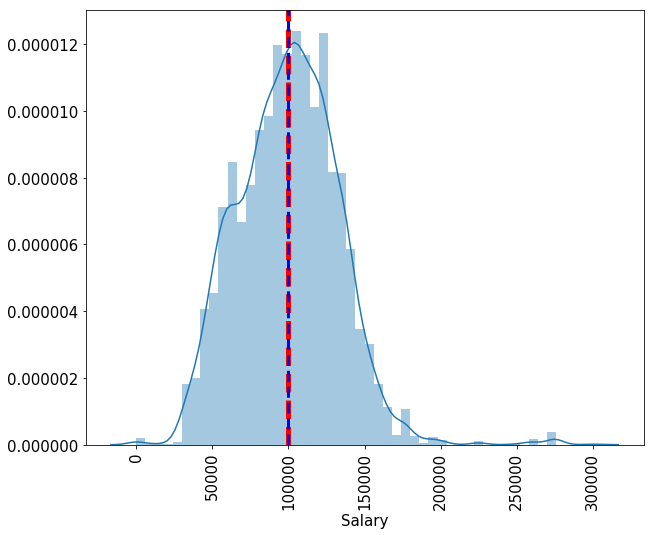

In [152]:
ax = sns.distplot(plot_salary['Salary'])
ax.axvline(plot_salary['Salary'].median(), lw=5,ls='dashed',color = 'red')
ax.axvline(plot_salary['Salary'].mean(), lw=3,ls = 'dashed',color ='blue',)
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 15
plt.xticks(rotation = 90)

## salary prediction test and train 

In [153]:
data_salary = salary_data_final[salary_data_final.abv_below_median.notnull()]

In [154]:
X_salary = data_salary.iloc[:,0:len(data_salary.columns)-1]

In [155]:
Y_salary = pd.DataFrame(data_salary['abv_below_median'])

### splitting the data into 80-20 . 80 train data , 20 test data
- they say that the default is 75-25 . you can use 50-50 also but the results for it is bad . the min split should be 75-25 to get a decent result


In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train,X_test,Y_train,Y_test = train_test_split(X_salary,Y_salary,test_size = 0.2, stratify= Y_salary,random_state = 70)

X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
Y_test.reset_index(drop= True , inplace= True)
Y_train.reset_index(drop= True, inplace= True)


In [198]:
X_train

,Company,Job_Title,Location,Salary,Summary
0,"AIMCO Properties, L.P.",Financial Analyst - FP&A,"Denver, CO",76000.0,In support of this mission object...
1,AT&T,Senior-System Engineer,"Bothell, WA",114500.0,The Senior Systems Engineer - Tes...
2,Opal,Senior DevSecOps Engineer,"Portland, OR",157500.0,"Architect, support, test, and maintain CI/CD ..."
3,Standard Homeopathic Company / Hyland's,Data Analyst,"Los Angeles, CA",61500.0,The Data Analyst will provide cri...
4,Carnegie Robotics LLC,Devops Engineer,"Pittsburgh, PA",120000.0,Help improve the overall software...
5,"Ayoub and Mansour, LLC",Paralegal and Data Analyst and of...,"Atlanta, GA",35000.0,This is an entry level position f...
6,Expected Behavior,Ruby Software Developer,"Indianapolis, IN",122500.0,As a software developer at Expect...
7,Growing Startup,Senior Software Engineer,"St. Louis, MO",105000.0,4+ years as a professional softwa...
8,Epsilon,AEM Technical Architect (Remote w...,"Plano, TX",122000.0,Must be able to demonstrate a str...
9,"RF-SMART, a division of ICS",C# Software Developer / Technical...,"Jacksonville, FL",80500.0,Software Development Principles. It takes a p...


## count vectorizer

In [162]:
from sklearn.feature_extraction.text import CountVectorizer

In [163]:
count_vctr = CountVectorizer(stop_words='english',ngram_range=(1,3),min_df=.05)

In [164]:
count_vctr.fit(X_train['Job_Title'])

train_Job_Title = pd.DataFrame(count_vctr.transform(X_train['Job_Title']).todense(),columns = count_vctr.get_feature_names())

In [165]:
job_salary_observe = pd.concat([train_Job_Title,Y_train],axis = 1)
job_salary_observe.head()

,analyst,architect,business,data,data scientist,developer,engineer,scientist,senior,software,software developer,software engineer,systems,abv_below_median
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0
2,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0


In [166]:
for i in range(2):
    title_count = job_salary_observe[job_salary_observe['abv_below_median']==i].sum(axis= 0)
    print(i,"most common words(above =1 or below = 0 median)")
    tc = title_count.sort_values(ascending = False).head(20)
    print(tc)

0 most common words(above =1 or below = 0 median)
analyst               1547.0
engineer              1096.0
software               963.0
software engineer      592.0
developer              488.0
data                   458.0
senior                 322.0
business               283.0
systems                261.0
software developer     249.0
scientist              234.0
data scientist         119.0
architect               80.0
abv_below_median         0.0
dtype: float64
1 most common words(above =1 or below = 0 median)
abv_below_median      3916.0
engineer              1514.0
software              1303.0
software engineer      932.0
data                   885.0
architect              883.0
scientist              661.0
data scientist         627.0
senior                 611.0
developer              379.0
systems                207.0
analyst                195.0
software developer     146.0
business               122.0
dtype: float64


##### From Above we can see that 
- Here we can see that the frequency of analyst is more in blow median jobs(ie.1371) and is less in above median jobs(ie.192)
- Similarly we see that the frequency of architect is more in above median jobs(ie.911) where as its less in below median jobs(ie.75)

In [394]:
job_ct_below_median = job_salary_observe[job_salary_observe['abv_below_median']==0].sum(axis=0)
job_ct_abv_median = job_salary_observe[job_salary_observe['abv_below_median']==1].sum(axis=0)
title_ct_comp = pd.DataFrame([job_ct_below_median,job_ct_abv_median])

 

In [168]:
title_ct_comp['abv_below_ratio'] = title_ct_comp[1]/title_ct_comp[0]

In [169]:
title_ct_comp['abv_below_ratio'].sort_values(ascending = False)

abv_below_median            inf
architect             11.037500
data scientist         5.268908
scientist              2.824786
data                   1.932314
senior                 1.897516
software engineer      1.574324
engineer               1.381387
software               1.353063
systems                0.793103
developer              0.776639
software developer     0.586345
business               0.431095
analyst                0.126050
Name: abv_below_ratio, dtype: float64

In [325]:
X_salary = data_salary[['Company','Job_Title','Location','Summary']]
X_salary.reset_index(drop = True, inplace=True)

In [326]:
Y_salary = pd.DataFrame(data_salary['abv_below_median'])
Y_salary = pd.DataFrame.as_matrix(Y_salary).ravel()

/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [327]:
X_salary['contains_Chicago_Dc_Sf'] = 0


/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [328]:
X_salary.ix[(X_salary['Location'].str.contains('Chicago, IL') |
             X_salary['Location'].str.contains('Washington, DC') |
             X_salary['Location'].str.contains('San Francisco Bay Area, CA') |
             X_salary['Location'].str.contains('South San Francisco, CA') |
             X_salary['Location'].str.contains('San Francisco, CA')), 'contains_Chicago_Dc_Sf'] = 1




/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### seperating bad and good jobs

In [329]:
X_salary['good_job'] = 0

In [330]:
X_salary.ix[(X_salary['Job_Title'].str.contains('architect') | 
             X_salary['Job_Title'].str.contains('data') |
             X_salary['Job_Title'].str.contains('software') |
             X_salary['Job_Title'].str.contains('senior')),'good_job'] = 1

/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [331]:
X_salary['bad_job'] = 0

In [332]:
X_salary.ix[(X_salary['Job_Title'].str.contains('software developer') |
             X_salary['Job_Title'].str.contains('analyst') |
             X_salary['Job_Title'].str.contains('business')), 'bad_job'] = 1

/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


### separating bad and good companies 

In [333]:
X_salary['good_company'] = 0

In [334]:
X_salary.ix[(X_salary['Company'].str.contains('Daniels Associates')|
             X_salary['Company'].str.contains('eRetailing Associates, LLC')|
             X_salary['Company'].str.contains('Kimley-Horn and Associates, Inc.')|
             X_salary['Company'].str.contains('Manhattan Associates')|
             X_salary['Company'].str.contains('Smith & Associates')|
             X_salary['Company'].str.contains('BERRETT & ASSOCIATES, INC')|
             X_salary['Company'].str.contains('Childs, Smith & Associates')|
             X_salary['Company'].str.contains('  Lin and Associates, Inc.')|
             X_salary['Company'].str.contains('Medical Care Associates, L.L.C.')|
             X_salary['Company'].str.contains('Northwoods Associates')|
             X_salary['Company'].str.contains('Sujansky & Associates')),'good_company'] =1

/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [335]:
X_salary['bad_company'] = 0

In [336]:
X_salary.ix[(X_salary['Company'].str.contains('George Mason University') | 
             X_salary['Company'].str.contains('University of South Florida') |
             X_salary['Company'].str.contains('Washington University in St. Louis') |
             X_salary['Company'].str.contains('Saint Louis University') |
             X_salary['Company'].str.contains('Seattle Pacific University')|
             X_salary['Company'].str.contains('Stanford University') |
             X_salary['Company'].str.contains('University of California Berkeley') |
             X_salary['Company'].str.contains('California State University') |
             X_salary['Company'].str.contains('University of California San Francisco') |
             X_salary['Company'].str.contains('National University') |
             X_salary['Company'].str.contains('The University of Pittsburgh') |
             X_salary['Company'].str.contains('Urban Health Collaborative- Drexel University') |
             X_salary['Company'].str.contains('University of California Office of the President') |
             X_salary['Company'].str.contains('Carnegie Mellon University') |
             X_salary['Company'].str.contains('University of Texas at Austin') |
             X_salary['Company'].str.contains('Northeastern Illinois University') |
             X_salary['Company'].str.contains('Florida International University') |
            X_salary['Company'].str.contains('Indiana University-Purdue University Indianapolis') |
            X_salary['Company'].str.contains('Ohio State University Medical Center') |
            X_salary['Company'].str.contains('Oregon Health & Science University') |
            X_salary['Company'].str.contains('Rice University') |
            X_salary['Company'].str.contains('The Ohio State University') |
            X_salary['Company'].str.contains('University of Colorado') |
            X_salary['Company'].str.contains('University of Colorado Boulder') | 
            X_salary['Company'].str.contains('University of Miami') |
            X_salary['Company'].str.contains('University of Miami - UHealth') |
            X_salary['Company'].str.contains('University of Washington')),'bad_company'] = 1
             

/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


### Location check 

In [337]:
X_salary['loc_check'] = 0

In [338]:
X_salary.ix[(X_salary['Location'].str.contains('New York') |
             X_salary['Location'].str.contains('Chicago') |
             X_salary['Location'].str.contains('Seattle') |
             X_salary['Location'].str.contains('San Francisco') |
             X_salary['Location'].str.contains('Houston') |
             X_salary['Location'].str.contains('Denver') |
             X_salary['Location'].str.contains('Austin') |
             X_salary['Location'].str.contains('Washington DC') |
             X_salary['Location'].str.contains('Miami') |
             X_salary['Location'].str.contains('Phoenix') |
             X_salary['Location'].str.contains('Pittsburgh') |
             X_salary['Location'].str.contains('Portland') |
             X_salary['Location'].str.contains('Philadelphia') |
             X_salary['Location'].str.contains('Boulder') |
             X_salary['Location'].str.contains('Dallas') |
             X_salary['Location'].str.contains('Los Angeles') |
             X_salary['Location'].str.contains('Atlanta')), 'loc_check'] = 1

/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


### Job Summary classification into good and bad 

In [339]:
X_salary['good_summary']  = 0

In [340]:
X_salary.ix[(X_salary['Summary'].str.contains('architect') |
            X_salary['Summary'].str.contains('data') |
            X_salary['Summary'].str.contains('senior') |
            X_salary['Summary'].str.contains('software engineer') |
            X_salary['Summary'].str.contains('software')), 'good_summary'] = 1

/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [341]:
X_salary['bad_summary'] = 0

In [342]:
X_salary.ix[(X_salary['Summary'].str.contains('business') |
             X_salary['Summary'].str.contains('analyst') |
             X_salary['Summary'].str.contains('research') |
             X_salary['Summary'].str.contains('analysis')), 'bad_summary'] = 1

/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [343]:
X_salary.drop(['Company' , 'Job_Title','Location','Summary'], axis = 1,inplace= True)

In [344]:
X_salary = X_salary.astype(float)

In [345]:
X_salary.head()

,contains_Chicago_Dc_Sf,good_job,bad_job,good_company,bad_company,loc_check,good_summary,bad_summary
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [346]:
salary_pred_correlation = X_salary.corr()

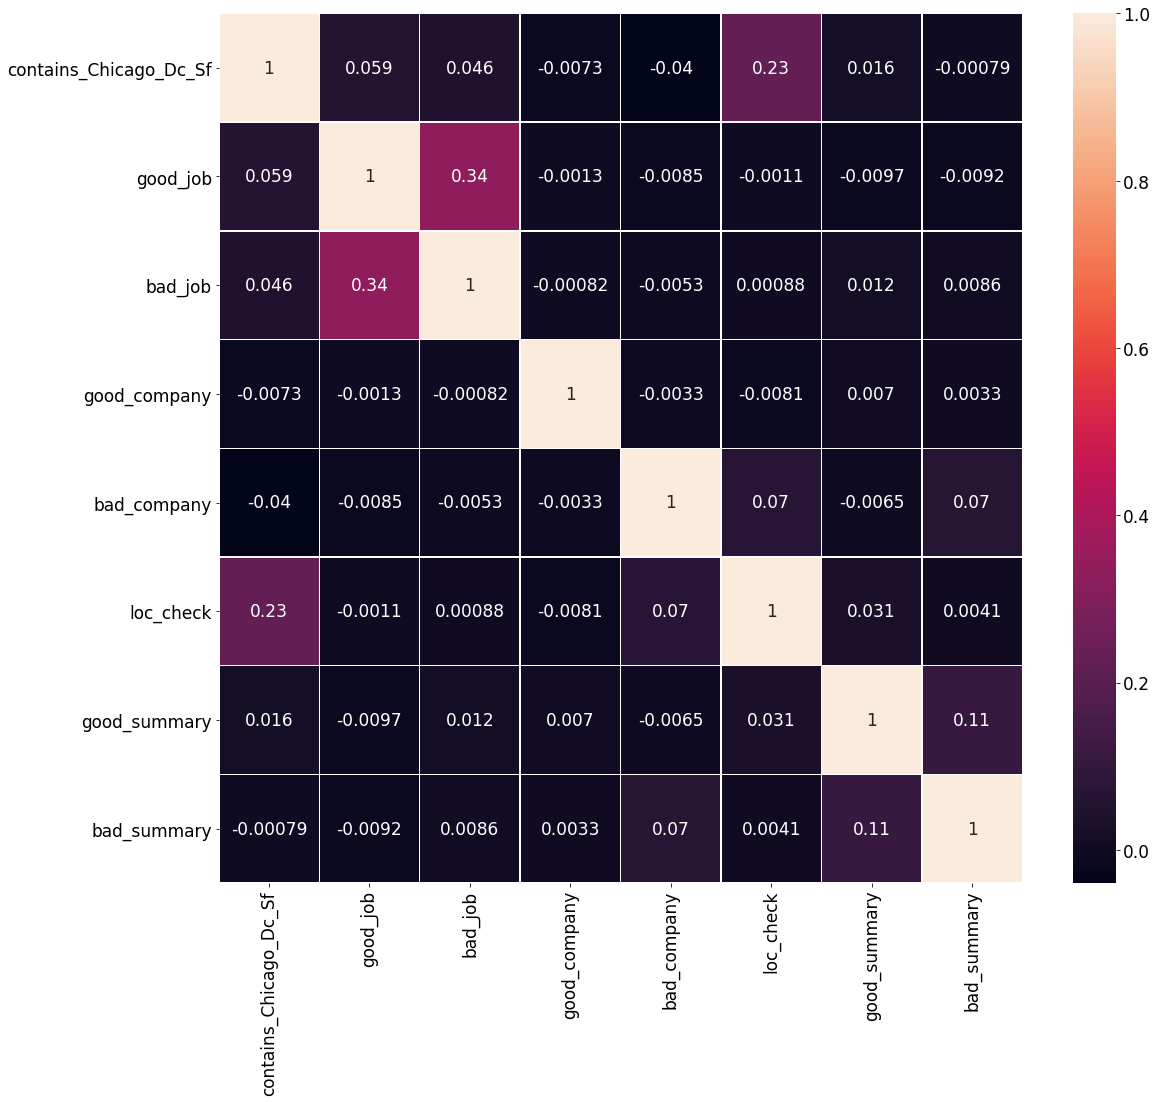

In [347]:
sns.heatmap(salary_pred_correlation, annot = True, linewidths= 0.5)

In [348]:
Y_salary

array([1., 1., 0., ..., 0., 0., 0.])

In [349]:
x_train, x_test, y_train, y_test = train_test_split(X_salary, Y_salary, test_size=0.2, stratify= Y_salary, random_state=70)

In [350]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [351]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
print('score',logistic_regression.score(x_train,y_train))

cross_valid = cross_val_score(logistic_regression, x_train, y_train, cv = 9)
print('score cross_val ',cross_valid)

score 0.5648971297942595
score cross_val  [0.55022831 0.58857143 0.56114286 0.57028571 0.56457143 0.53942857
 0.57142857 0.5617849  0.56864989]


/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

In [352]:
y_prediction = logistic_regression.predict(x_test)
print('Score',logistic_regression.score(x_test,y_test))

Score 0.5505332656170645


In [353]:
y_prediction

array([1., 0., 0., ..., 1., 0., 0.])

In [354]:
y_test

array([0., 1., 0., ..., 0., 1., 0.])

In [355]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [356]:
print(confusion_matrix(y_test,y_prediction,))
target_names = ['below_median', 'abv_median']
print(classification_report(y_test,y_prediction,target_names=target_names))

[[695 295]
 [590 389]]
              precision    recall  f1-score   support

below_median       0.54      0.70      0.61       990
  abv_median       0.57      0.40      0.47       979

   micro avg       0.55      0.55      0.55      1969
   macro avg       0.55      0.55      0.54      1969
weighted avg       0.55      0.55      0.54      1969



In [273]:

data_prediction = salary_data_final[salary_data_final['Location'].str.contains('New York, NY') |
                                    salary_data_final['Location'].str.contains('Boston, MA' ) |   
                                     salary_data_final['Location'].str.contains('Chicago, IL') |   
                                     salary_data_final['Location'].str.contains('Washington, DC') |   
                                     salary_data_final['Location'].str.contains('San Francisco, CA ') |   
                                     salary_data_final['Location'].str.contains('Seattle, WA ') |   
                                     salary_data_final['Location'].str.contains('California') |   
                                     salary_data_final['Location'].str.contains('Cambridge, MA ') |   
                                     salary_data_final['Location'].str.contains('Austin, TX ')]

In [274]:
data_prediction['Location'] = data_prediction['Location'].str.split( ',', expand=True, n=1)

/Users/satvikashetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [275]:
data_prediction

,Company,Job_Title,Location,Salary,Summary,abv_below_median,Salary_Prediction
42,Suited,Data Engineer,Austin,110000.0,Deep understanding of data modeli...,1.0,1.0
43,eBay Inc.,Data Scientist,Austin,115000.0,Decision Science contains both da...,1.0,1.0
44,Suited,Data Engineer,Austin,110000.0,Deep understanding of data modeli...,1.0,1.0
46,IBM,Campaign Manager - Data Science a...,Austin,123000.0,"IBM’s fast growing data science, ...",1.0,1.0
54,Sips by,Account Coordinator,Austin,37000.0,Data scientist and Taste Expert created prefe...,0.0,1.0
59,Suited,Data Engineer,Austin,110000.0,Deep understanding of data modeli...,1.0,1.0
60,Novi Labs,Senior Full Stack Engineer Python...,Austin,125000.0,Novi Labs is a VC backed technolo...,1.0,1.0
62,CDK Global,Lead User Experience Designer,Austin,112000.0,Accelerate Your Career Drive glo...,1.0,1.0
63,Sips by,Account Coordinator,Austin,37000.0,Sips by™ plays matchmaker for the...,0.0,1.0
67,CDK Global,PostgresSQL Software Engineer IV ...,Austin,108000.0,Accelerate Your Career Drive glo...,1.0,1.0


In [268]:
X_salary

,contains_Chicago_Dc_Sf,good_job,bad_job,good_company,bad_company,loc_check,good_summary,bad_summary
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [276]:
loc_pred = pd.DataFrame(data_prediction[['Location','Salary_Prediction']])

In [279]:
plt.rcParams['figure.figsize'] = (18,16)
plt.rcParams['font.size'] = 17

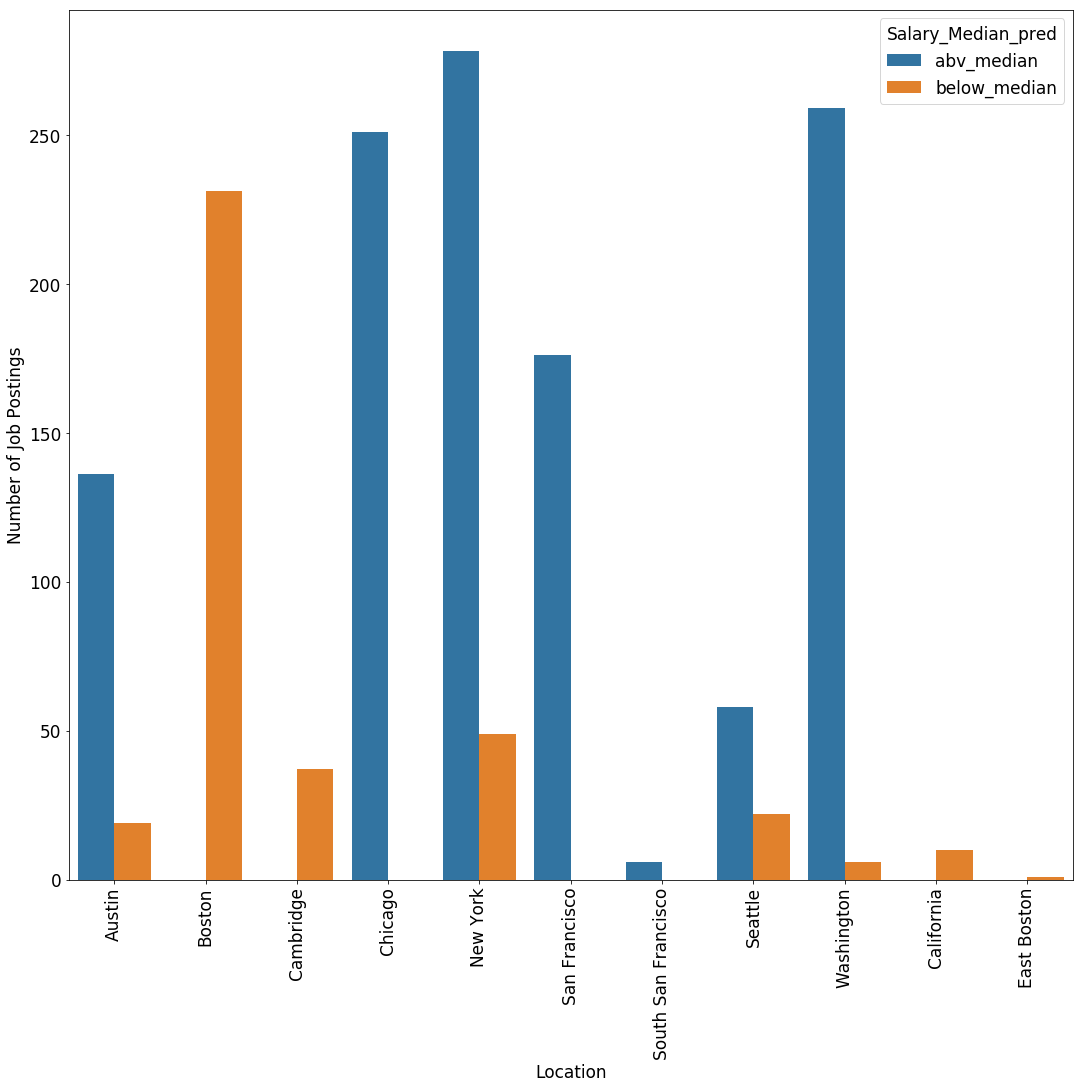

In [280]:
loc_pred['Salary_Median_pred'] = loc_pred['Salary_Prediction'].map({0:'below_median', 1:'abv_median'})
sns.countplot(x='Location', hue='Salary_Median_pred', data= loc_pred)
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=90)

plt.show()

### word cloud and skill set prediction 

In [382]:
from urllib.request import urlopen
from collections import Counter
from nltk.corpus import stopwords 
%matplotlib inline

In [383]:
def text_cleaner(web_links): 
   
    try:
        link = urlopen(web_links).read() 
    except: 
        return "No" 
    
    soup_obj = BeautifulSoup(link) 
    
    for script in soup_obj(["script", "style"]):
        script.extract() 
    
    

    txt = soup_obj.get_text() 
    
        
    
    lines = (line.strip() for line in txt.splitlines()) 
    
        
        
    parts = (phrase.strip() for line in lines for phrase in line.split("  ")) 
    
    def part_space(part):
        part_out = part + ' ' 
        return part_out  
        
    
    txt = ''.join(part_space(part) for part in parts if part).encode('utf-8') 
    
        
   
        
    try:
        txt = txt.decode("utf-8")
        
    except:                                                            
        return "X"                                                         
                
    txt = re.sub("[^a-zA-Z.+3]"," ", txt)  
        
       
    txt = txt.lower().split()  
        
        
    stp_wrds = set(stopwords.words("english")) 
    txt = [w for w in txt if not w in stp_wrds]
        
        
        
    txt = list(set(txt)) 
                            
        
    return txt

In [384]:
sample_data = text_cleaner('https://www.indeed.com/viewjob?jk=5505e59f8e5a32a4&q=%22data+scientist%22&tk=19ftfgsmj19ti0l3&from=web&advn=1855944161169178&sjdu=QwrRXKrqZ3CNX5W-O9jEvWC1RT2wMYkGnZrqGdrncbKqQ7uwTLXzT1_ME9WQ4M-7om7mrHAlvyJT8cA_14IV5w&pub=pub-indeed')
sample_data[:20] 

['catered',
 'build',
 'hour',
 'every',
 'dress',
 'month.',
 'scale',
 'wastarbucks',
 'searchdata',
 'focusing',
 'seeker...let',
 'economics',
 'jobsadvanced',
 'analyzing',
 'quantitative',
 'engineer',
 'resumesign',
 'pandas',
 'likesr',
 'match']

In [385]:
def skills_info(city = None, state = None):
    
        
    final_job = 'data+scientist' 
    
    
    if city is not None:
        final_city = city.split() 
        final_city = '+'.join(cty for cty in final_city)
        final_list = ['http://www.indeed.com/jobs?q=%22'+ final_job+'%22&l='+final_city+
                    '%2C+'+state] 
    else:
        final_list = ['http://www.indeed.com/jobs?q="'+final_job+ '"']

    final_site = ''.join(final_list) 

    
    base_url = 'http://www.indeed.com'
    
    
    try:
        html =  urlopen(final_site).read() 
    except:
        'No Jobs Found For the input combination ' 
        return
    soup = BeautifulSoup(html) 
    
    
    
    Total_no_jobs = soup.find(id = 'searchCount').string.encode('utf-8') 
                                                                        
    Total_no_jobs = Total_no_jobs.decode("utf-8")
    no_of_jobs = re.findall('\d+', Total_no_jobs) 
    
    if len(no_of_jobs) > 3: 
        total_jobs = (int(no_of_jobs[2])*1000) + int(no_of_jobs[3])
    else:
        total_jobs = int(no_of_jobs[1]) 
    
    city_label = city
    if city is None:
        city_label = 'Nationwide'
        
    print ('There were', total_jobs, 'jobs found,', city_label) 
    
    num_of_pages = int(total_jobs/10) 
                                      
    job_desc = [] 
    
    for i in range(1,num_of_pages+1): 
        print ('Getting page', i)
        start_num = str(i*10) 
        current_page = ''.join([final_site + '&start='+start_num])
        
            
        html_page =  urlopen(current_page).read() 
            
        page_object = BeautifulSoup(html_page) 
        job_link= page_object.find(id = 'resultsCol')    
        job_URLS = [base_url + str(link.get('href')) for link in job_link.find_all('a')]  
        job_URLS = list(filter(lambda x:'clk' in x, job_URLS)) 
        for j in range(0,len(job_URLS)):
            final_desc = text_cleaner(job_URLS[j])
            if final_desc: 
                job_desc.append(final_desc)
            sleep(1)  
        
       
  
    
    
    skill_frequency = Counter()  
    [skill_frequency.update(item) for item in job_desc] 
    
    
    
    
    
    program_dict = Counter({'R':skill_frequency['r'], 'Python':skill_frequency['python'],
                    'Java':skill_frequency['java'], 'C++':skill_frequency['c++'],
                    'Ruby':skill_frequency['ruby'],
                    'Perl':skill_frequency['perl'], 'Matlab':skill_frequency['matlab'],
                    'JavaScript':skill_frequency['javascript'], 'Scala': skill_frequency['scala']})
                      
    analysis_dict = Counter({'Excel':skill_frequency['excel'],  'Tableau':skill_frequency['tableau'],
                        'D3.js':skill_frequency['d3.js'], 'SAS':skill_frequency['sas'],
                        'SPSS':skill_frequency['spss'], 'D3':skill_frequency['d3']})  

    bigdata_dict = Counter({'Hadoop':skill_frequency['hadoop'], 'MapReduce':skill_frequency['mapreduce'],
                'Spark':skill_frequency['spark'], 'Pig':skill_frequency['pig'],
                'Hive':skill_frequency['hive'], 'Shark':skill_frequency['shark'],
                'Oozie':skill_frequency['oozie'], 'ZooKeeper':skill_frequency['zookeeper'],
                'Flume':skill_frequency['flume'], 'Mahout':skill_frequency['mahout']})
                
    database_dict = Counter({'SQL':skill_frequency['sql'], 'NoSQL':skill_frequency['nosql'],
                    'HBase':skill_frequency['hbase'], 'Cassandra':skill_frequency['cassandra'],
                    'MongoDB':skill_frequency['mongodb']})
                     
               
    total_skills = program_dict + analysis_dict + bigdata_dict + database_dict 
    
        
    print("skills retrieved from the data ")
    
    final_data = pd.DataFrame.from_dict(total_skills, orient='index').reset_index()
    final_data = final_data.rename(columns={'index':'skills', 0:'Skill_count'})
    

    
    final_data.sort_values(by = 'Skill_count', ascending = False, inplace = True)
   
    
        
    final_data_plt = final_data.plot(x = 'skills', kind = 'bar', legend = None)
        
    final_data_plt.set_ylabel('skills in percentage')
    final_figure = final_data_plt.get_figure() 
        
    
    return final_figure, final_data
    

There were 531 jobs found, New York
Getting page 1
Getting page 2
Getting page 3
Getting page 4
Getting page 5
Getting page 6
Getting page 7
Getting page 8
Getting page 9
Getting page 10
Getting page 11
Getting page 12
Getting page 13
Getting page 14
Getting page 15
Getting page 16
Getting page 17
Getting page 18
Getting page 19
Getting page 20
Getting page 21
Getting page 22
Getting page 23
Getting page 24
Getting page 25
Getting page 26
Getting page 27
Getting page 28
Getting page 29
Getting page 30
Getting page 31
Getting page 32
Getting page 33
Getting page 34
Getting page 35
Getting page 36
Getting page 37
Getting page 38
Getting page 39
Getting page 40
Getting page 41
Getting page 42
Getting page 43
Getting page 44
Getting page 45
Getting page 46
Getting page 47
Getting page 48
Getting page 49
Getting page 50
Getting page 51
Getting page 52
Getting page 53
skills retrieved from the data 


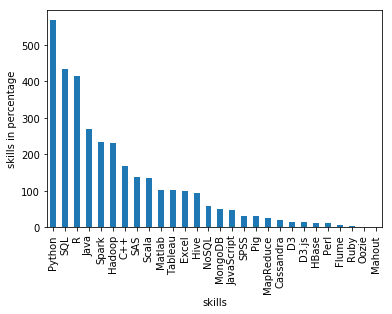

In [386]:
loc_ny = skills_info(city = 'New York', state = 'NY')

In [387]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [388]:
word_cloud_data = loc_ny[1]

In [389]:
word_cloud_data = word_cloud_data.set_index('skills')['Skill_count'].to_dict()
word_cloud_data

{'Python': 567,
 'SQL': 433,
 'R': 414,
 'Java': 269,
 'Spark': 235,
 'Hadoop': 232,
 'C++': 167,
 'SAS': 137,
 'Scala': 136,
 'Matlab': 103,
 'Tableau': 102,
 'Excel': 99,
 'Hive': 94,
 'NoSQL': 59,
 'MongoDB': 51,
 'JavaScript': 48,
 'SPSS': 32,
 'Pig': 30,
 'MapReduce': 26,
 'Cassandra': 20,
 'D3': 16,
 'D3.js': 15,
 'HBase': 13,
 'Perl': 12,
 'Flume': 7,
 'Ruby': 5,
 'Oozie': 1,
 'Mahout': 1}

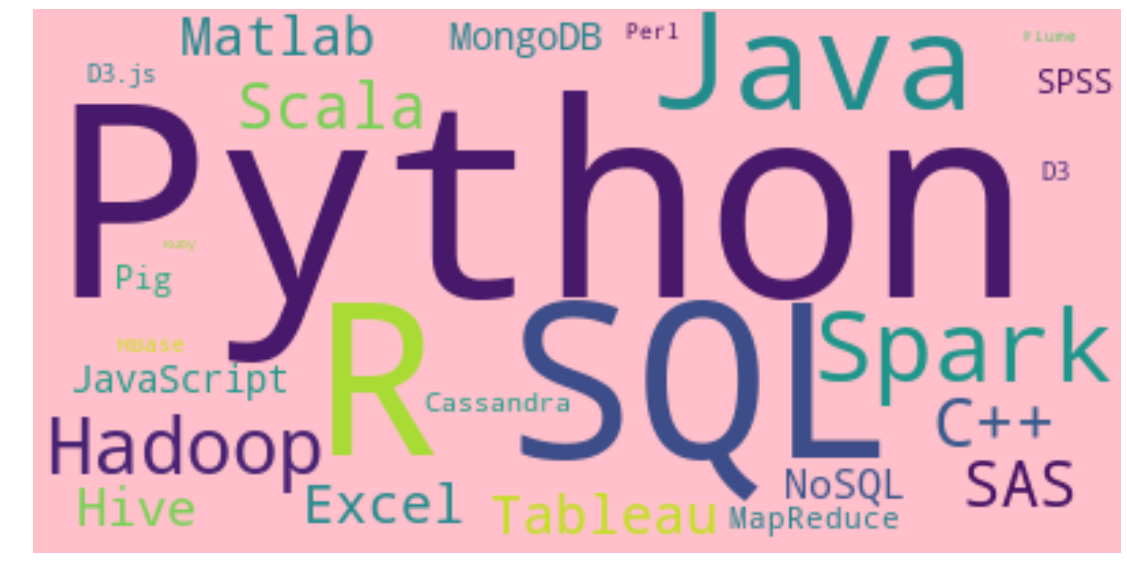

In [390]:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="pink")
wordcloud.generate_from_frequencies(frequencies=word_cloud_data)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Conclusion 

- 1: In salary prediction we found that the above median salary for new york is the most 
- 2: The frequency of analyst is more in blow median jobs(ie.1371) and is less in above            median jobs(ie.192)
- 3: The frequency of architect is more in above median jobs(ie.911)where as its less in below      median jobs(ie.75)
- 4: Python, R , and Hadoop are some the key skill set that every data scientist needs to know
- 5: It is okay for the data scientist to not know skills like Mahout,Oozie and Ruby. 

In [ ]:
# CONTRIBUTION: 
1. BY SELF: 90%
2. FROM EXTERNAL SOURCE: 10%

# License

                       Copyright @2019     SATVIKA SHETTY 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Citation 

BeautifulSoup (Data Scraping ) and concepts  :

https://www.youtube.com/watch?v=ng2o98k983k

https://medium.com/@msalmon00/web-scraping-job-postings-from-indeed-96bd588dcb4b

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

